In [13]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [14]:
df = pd.read_csv('testSet_rand1200.gct', sep='\t')
df.drop(columns='Description', inplace=True)

In [15]:
if df.index.dtype != 'O':
    df.set_index(keys=df.columns[0], inplace=True)
df = df.select_dtypes(include=[np.number])
df = df.rank(axis=0, method='average', na_option='bottom')
df = 10000*df / df.shape[0]

In [16]:
def score_tensor(gene_arr):
    sarray = []
    gene_mean_exp = np.mean(gene_arr)
    gene_std_exp = np.std(gene_arr)
    sarray = np.subtract(gene_arr, (gene_mean_exp/gene_std_exp))
#     for gene_idx, gene_exp in enumerate(gene_arr):
#         rem_gene_exp = np.delete(gene_arr, gene_idx)
#         rem_cum_exp = np.sum(rem_gene_exp) / len(rem_gene_exp)
#         score = gene_exp - rem_cum_exp
#         sarray.append(score)
    return sarray

In [17]:
df1 = pd.DataFrame(index=df.index, columns=df.columns)
for _, ser in df.iteritems():
    dat = ser.sort_values(ascending=False)
    gene_arr = dat.values
    scores = score_tensor(gene_arr=gene_arr)
    df1[ser.name] = scores

In [18]:
df1

,AA488_A1.2,AA489_A2.2,AA490_A3,AA491_B1,AA492_B2,AA493_B3,AA494_C1.2,AA495_C2,AA496_C3,AA497_D1.2,AA498_D3.2,AA499_D2,AA500_x2,AA501_X3,AA502_X2.2,AA503_Y1,AA504_Y2,AA505_Y3
NAME,,,,,,,,,,,,,,,,,,
SCNN1G,9998.266505,9998.266505,9998.266505,9998.266505,9998.266505,9998.266505,9998.266504,9998.266504,9998.266505,9998.266505,9998.266504,9998.266505,9998.266505,9998.266504,9998.266504,9998.266505,9998.266505,9998.266504
SLC22A9,9989.953953,9989.953953,9989.953953,9989.953953,9989.953953,9989.953953,9989.953952,9989.953952,9989.953953,9989.953953,9989.953952,9989.953953,9989.953953,9989.953952,9989.953952,9989.953953,9989.953953,9989.953952
RASGRP2,9981.641401,9981.641401,9981.641401,9977.485125,9981.641401,9981.641401,9981.641400,9981.641401,9981.641401,9981.641401,9981.641401,9981.641401,9981.641401,9981.641400,9981.641400,9981.641401,9981.641401,9981.641400
CAPN3,9973.328849,9973.328849,9973.328849,9977.485125,9973.328849,9973.328849,9973.328848,9973.328849,9973.328849,9973.328849,9973.328849,9973.328849,9973.328849,9973.328849,9973.328848,9973.328849,9969.172573,9973.328848
ARAP2,9965.016297,9960.860021,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016297,9965.016296,9965.016297,9969.172573,9965.016297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EEF1A1,35.672989,43.985540,39.829265,39.829265,35.672989,39.829265,35.672988,43.985540,39.829264,39.829264,39.829264,39.829265,39.829264,52.298092,39.829264,52.298092,39.829264,35.672988
RPS10,35.672989,31.516713,31.516713,31.516713,35.672989,31.516713,35.672988,27.360436,31.516713,31.516712,31.516712,27.360437,31.516713,31.516712,31.516712,31.516713,31.516712,35.672988
RPLP2,23.204161,23.204161,23.204161,23.204161,23.204161,19.047885,23.204160,27.360436,23.204161,23.204160,23.204160,27.360437,23.204161,23.204160,23.204160,23.204161,23.204160,23.204160


In [27]:
a = np.array([1, 2, 3, 4])
b = a.copy()
for gene_idx, gene in enumerate(a):
    print(np.delete(a, gene_idx))

[2 3 4]
[1 3 4]
[1 2 4]
[1 2 3]


In [51]:
label = [0]*6
label.extend([1]*6)
label.extend([2]*6)

In [63]:
df2 = df1.transpose()
Y = pd.DataFrame(data=label, index=df2.index, columns=['label'])

In [64]:
pca = PCA(n_components=2)
X = pca.fit_transform(df2)

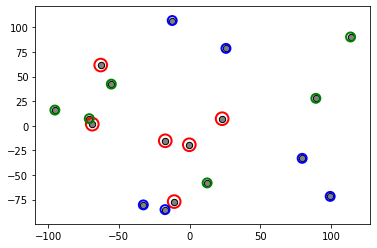

In [72]:
zero_class = np.where(Y['label']==0)
one_class = np.where(Y['label']==1)
two_class = np.where(Y['label']==2)
plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='r',
            facecolors='none', linewidths=2, label='Class 1')
plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='g',
            facecolors='none', linewidths=2, label='Class 2')
plt.scatter(X[two_class, 0], X[two_class, 1], s=80, edgecolors='b',
            facecolors='none', linewidths=2, label='Class 3')
plt.show()

In [57]:
print(zero_class)

(array([], dtype=int64),)


In [71]:
np.where(Y['label']==0)

(array([0, 1, 2, 3, 4, 5]),)

In [87]:
df = pd.read_csv('y_ave.tsv', sep='\t', index_col=0)
df = df.transpose()
df.drop(index='ControlType', inplace=True)

In [89]:
label = [1]*20
label.extend([0]*3)
Y = pd.DataFrame(data=label, index=df.index, columns=['label'])

In [91]:
pca = PCA(n_components=2)
X = pca.fit_transform(df)

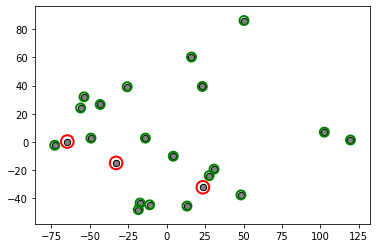

In [92]:
zero_class = np.where(Y['label']==0)
one_class = np.where(Y['label']==1)
plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='r',
            facecolors='none', linewidths=2, label='Class 1')
plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='g',
            facecolors='none', linewidths=2, label='Class 2')
plt.show()

In [ ]:
+